# Analysis

## import ライブラリー

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

## Data定義

In [2]:
%%time
df_subjects_info = pd.read_csv('../02_data_analysis/subjects_info/subjects_info.csv')
#df_aal = pd.read_csv('../02_data_analysis/roi_timeseries/timeseries_aal.csv')
#df_ho = pd.read_csv('../02_data_analysis/roi_timeseries/timeseries_ho.csv')

#df_dynamic_aal = pd.read_csv('../02_data_analysis/dynamic_FC/dynamic_aal.csv')
#df_dynamic_ho = pd.read_csv('../02_data_analysis/dynamic_FC/dynamic_ho.csv')

CPU times: user 27 ms, sys: 1.35 ms, total: 28.3 ms
Wall time: 33.3 ms


In [3]:
def make_info_data(df = df_subjects_info,col = ['Age','Sex','やる気スコア(Apathy scale)']):
    subID = np.array(df.subID)
    subjects_info_list = []
    for ID in subID:
        data = np.array(df[df.subID == ID][col])[0]
        if 'Sex' in col:
            idx_sex = col.index('Sex')
            if data[idx_sex] == '男':
                data[idx_sex] = 0
            else:
                data[idx_sex] = 1
        
        subjects_info_list.append(data)
    subjects_info = np.array(subjects_info_list)
    
    if 'Age' in col:
        idx_age = col.index('Age')
    for i in range(len(col)):
        if i == idx_age:
            subjects_info[:,i] = (subjects_info[:,i] - \
                                  np.mean(subjects_info[:,i]))/np.std(subjects_info[:,i])
    return subjects_info.astype(np.float)

def make_data(df, subID = df_subjects_info.subID ,remove_list = ['time','subID']):
    data_list = []
    df_cols = list(df.columns)
    for r in remove_list:
        try:
            df_cols.remove(r)
        except:
            pass
    for ID in df_subjects_info.subID:
        data = df[df.subID == ID][df_cols]
        data = np.array(data)
        data_list.append(data)
    data = np.array(data_list)
    return data

In [4]:
%%time
data_label = make_info_data()
age_mean = df_subjects_info.Age.mean()
age_std = df_subjects_info.Age.std()

#data_aal = make_data(df_aal)
#data_ho = make_data(df_ho)
#data_dynamic_aal = make_data(df_dynamic_aal)
#data_dynamic_ho  = make_data(df_dynamic_ho)

CPU times: user 1.04 s, sys: 0 ns, total: 1.04 s
Wall time: 1.03 s


### AAL

In [5]:
aal_1 = np.load('../02_data_analysis/temp/all_aal_1.npz')
aal_2 = np.load('../02_data_analysis/temp/all_aal_2.npz')
aal_dynamic_1 = np.load('../02_data_analysis/temp/all_dynamic_aal_1.npz')
aal_dynamic_2 = np.load('../02_data_analysis/temp/all_dynamic_aal_2.npz')

test_pred_aal_1 = aal_1['arr_0']
test_pred_aal_inverse_1 = aal_1['arr_1']
test_label_aal_1 = aal_1['arr_2']
test_idx_aal_1 = aal_1['arr_3']
train_idx_aal_1 = aal_1['arr_4']

test_pred_aal_2 = aal_2['arr_0']
test_pred_aal_inverse_2 = aal_2['arr_1']
test_label_aal_2 = aal_2['arr_2']
test_idx_aal_2 = aal_2['arr_3']
train_idx_aal_2 = aal_2['arr_4']

test_pred_aal_dynamic_1 = aal_dynamic_1['arr_0']
test_pred_aal_dynamic_inverse_1 = aal_dynamic_1['arr_1']
test_label_aal_dynamic_1 = aal_dynamic_1['arr_2']
test_idx_aal_dynamic_1 = aal_dynamic_1['arr_3']
train_idx_aal_dynamic_1 = aal_dynamic_1['arr_4']

test_pred_aal_dynamic_2 = aal_dynamic_2['arr_0']
test_pred_aal_dynamic_inverse_2 = aal_dynamic_2['arr_1']
test_label_aal_dynamic_2 = aal_dynamic_2['arr_2']
test_idx_aal_dynamic_2 = aal_dynamic_2['arr_3']
train_idx_aal_dynamic_2 = aal_dynamic_2['arr_4']

### Harvard-Oxford

In [6]:
ho_1 = np.load('../02_data_analysis/temp/all_ho_1.npz')
ho_2 = np.load('../02_data_analysis/temp/all_ho_2.npz')
ho_dynamic_1 = np.load('../02_data_analysis/temp/all_dynamic_ho_1.npz')
ho_dynamic_2 = np.load('../02_data_analysis/temp/all_dynamic_ho_2.npz')

test_pred_ho_1 = ho_1['arr_0']
test_pred_ho_inverse_1 = ho_1['arr_1']
test_label_ho_1 = ho_1['arr_2']
test_idx_ho_1 = ho_1['arr_3']
train_idx_ho_1 = ho_1['arr_4']

test_pred_ho_2 = ho_2['arr_0']
test_pred_ho_inverse_2 = ho_2['arr_1']
test_label_ho_2 = ho_2['arr_2']
test_idx_ho_2 = ho_2['arr_3']
train_idx_ho_2 = ho_2['arr_4']

test_pred_ho_dynamic_1 = ho_dynamic_1['arr_0']
test_pred_ho_dynamic_inverse_1 = ho_dynamic_1['arr_1']
test_label_ho_dynamic_1 = ho_dynamic_1['arr_2']
test_idx_ho_dynamic_1 = ho_dynamic_1['arr_3']
train_idx_ho_dynamic_1 = ho_dynamic_1['arr_4']

test_pred_ho_dynamic_2 = ho_dynamic_2['arr_0']
test_pred_ho_dynamic_inverse_2 = ho_dynamic_2['arr_1']
test_label_ho_dynamic_2 = ho_dynamic_2['arr_2']
test_idx_ho_dynamic_2 = ho_dynamic_2['arr_3']
train_idx_ho_dynamic_2 = ho_dynamic_2['arr_4']

### Multi ALL

In [7]:
multi_aal_1 = np.load('../02_data_analysis/temp/all_multi_aal_1.npz')
multi_aal_2 = np.load('../02_data_analysis/temp/all_multi_aal_2.npz')
multi_aal_dynamic_1 = np.load('../02_data_analysis/temp/all_multi_dynamic_aal_1.npz')
multi_aal_dynamic_2 = np.load('../02_data_analysis/temp/all_multi_dynamic_aal_2.npz')

test_pred_multi_aal_1 = multi_aal_1['arr_0']
test_pred_multi_aal_inverse_1 = multi_aal_1['arr_1']
test_label_multi_aal_1 = multi_aal_1['arr_2']
test_idx_multi_aal_1 = multi_aal_1['arr_3']
train_idx_multi_aal_1 = multi_aal_1['arr_4']

test_pred_multi_aal_2 = multi_aal_2['arr_0']
test_pred_multi_aal_inverse_2 = multi_aal_2['arr_1']
test_label_multi_aal_2 = multi_aal_2['arr_2']
test_idx_multi_aal_2 = multi_aal_2['arr_3']
train_idx_multi_aal_2 = multi_aal_2['arr_4']

test_pred_multi_aal_dynamic_1 = multi_aal_dynamic_1['arr_0']
test_pred_multi_aal_dynamic_inverse_1 = multi_aal_dynamic_1['arr_1']
test_label_multi_aal_dynamic_1 = multi_aal_dynamic_1['arr_2']
test_idx_multi_aal_dynamic_1 = multi_aal_dynamic_1['arr_3']
train_idx_multi_aal_dynamic_1 = multi_aal_dynamic_1['arr_4']

test_pred_multi_aal_dynamic_2 = multi_aal_dynamic_2['arr_0']
test_pred_multi_aal_dynamic_inverse_2 = multi_aal_dynamic_2['arr_1']
test_label_multi_aal_dynamic_2 = multi_aal_dynamic_2['arr_2']
test_idx_multi_aal_dynamic_2 = multi_aal_dynamic_2['arr_3']
train_idx_multi_aal_dynamic_2 = multi_aal_dynamic_2['arr_4']

### Multi Harvard-Oxford

In [8]:
multi_ho_1 = np.load('../02_data_analysis/temp/all_multi_ho_1.npz')
multi_ho_2 = np.load('../02_data_analysis/temp/all_multi_ho_2.npz')
multi_ho_dynamic_1 = np.load('../02_data_analysis/temp/all_multi_dynamic_ho_1.npz')
multi_ho_dynamic_2 = np.load('../02_data_analysis/temp/all_multi_dynamic_ho_2.npz')

test_pred_multi_ho_1 = multi_ho_1['arr_0']
test_pred_multi_ho_inverse_1 = multi_ho_1['arr_1']
test_label_multi_ho_1 = multi_ho_1['arr_2']
test_idx_multi_ho_1 = multi_ho_1['arr_3']
train_idx_multi_ho_1 = multi_ho_1['arr_4']

test_pred_multi_ho_2 = multi_ho_2['arr_0']
test_pred_multi_ho_inverse_2 = multi_ho_2['arr_1']
test_label_multi_ho_2 = multi_ho_2['arr_2']
test_idx_multi_ho_2 = multi_ho_2['arr_3']
train_idx_multi_ho_2 = multi_ho_2['arr_4']

test_pred_multi_ho_dynamic_1 = multi_ho_dynamic_1['arr_0']
test_pred_multi_ho_dynamic_inverse_1 = multi_ho_dynamic_1['arr_1']
test_label_multi_ho_dynamic_1 = multi_ho_dynamic_1['arr_2']
test_idx_multi_ho_dynamic_1 = multi_ho_dynamic_1['arr_3']
train_idx_multi_ho_dynamic_1 = multi_ho_dynamic_1['arr_4']

test_pred_multi_ho_dynamic_2 = multi_ho_dynamic_2['arr_0']
test_pred_multi_ho_dynamic_inverse_2 = multi_ho_dynamic_2['arr_1']
test_label_multi_ho_dynamic_2 = multi_ho_dynamic_2['arr_2']
test_idx_multi_ho_dynamic_2 = multi_ho_dynamic_2['arr_3']
train_idx_multi_ho_dynamic_2 = multi_ho_dynamic_2['arr_4']

## 予測結果

In [9]:
n_splits = len(test_idx_aal_1)

In [10]:
def test_plot(preds,labels,title=''):
    for i in range(n_splits):
        if not i:
            label = labels[i,:,0:1]
        else:
            label = np.concatenate([label,labels[i,:,0:1]])

    for i in range(n_splits):
        if not i:
            pred = preds[i].mean(axis=0)[:,0:1]
        else:
            pred = np.concatenate([pred,preds[i].mean(axis=0)[:,0:1]])
    
    new_line = '\n'
    corr,p = pearsonr(label[:,0],pred[:,0])
    mae = mean_absolute_error_pred(preds,labels)
            
    lr = LinearRegression()
    lr.fit(label*age_std+age_mean,pred[:,0]*age_std+age_mean)

    plt.figure(figsize=(6, 6), dpi=80)
    plt.scatter(label[:,0]*age_std+age_mean,pred[:,0]*age_std+age_mean,
               label = f'corrcoef : {corr:.3f}{new_line}p value : {p}{new_line}MAE : {mae}')#散布図をプロット
    plt.plot(label[:,0]*age_std+age_mean,
             lr.predict(label*age_std+age_mean), color = 'red',
            label = f'y = {lr.coef_[0]:.3f}x + {lr.intercept_:.3f}')#回帰直線をプロット

    plt.title(title, fontsize=14)   # 図のタイトル
    plt.xlabel('chronological age', fontsize=14)# x軸のラベル
    plt.ylabel('predicted age', fontsize=14)    # y軸のラベル
    plt.legend(fontsize=10.5)
    plt.grid()     # グリッド線を表示
    plt.show()     # 図の表示

    print('相関係数: ', np.corrcoef(label[:,0],pred[:,0])[0,1])
    print('r^2 val data: ', r2_score(label[:,0],pred[:,0]))
    print('切片: ', lr.intercept_)
    print('傾き: ', lr.coef_[0])

In [11]:
def mean_absolute_error_pred(preds,labels):
    for i in range(n_splits):
        if not i:
            label = labels[i,:,0:1]
        else:
            label = np.concatenate([label,labels[i,:,0:1]])

    for i in range(n_splits):
        if not i:
            pred = preds[i].mean(axis=0)[:,0:1]
        else:
            pred = np.concatenate([pred,preds[i].mean(axis=0)[:,0:1]])
            
    label = label.reshape(-1)
    label = label*age_std+age_mean
    pred  = pred.reshape(-1)
    pred  = pred*age_std+age_mean
    
    return mean_absolute_error(pred,label)

def mean_squared_error_pred(preds,labels):
    for i in range(n_splits):
        if not i:
            label = labels[i,:,0:1]
        else:
            label = np.concatenate([label,labels[i,:,0:1]])

    for i in range(n_splits):
        if not i:
            pred = preds[i].mean(axis=0)[:,0:1]
        else:
            pred = np.concatenate([pred,preds[i].mean(axis=0)[:,0:1]])
    
    label = label.reshape(-1)
    label = label*age_std+age_mean
    pred  = pred.reshape(-1)
    pred  = pred*age_std+age_mean
    
    return mean_squared_error(pred,label)

In [12]:
mean_absolute_error_pred(test_pred_aal_1,test_label_aal_1)
mean_absolute_error_pred(test_pred_aal_2,test_label_aal_2)
mean_absolute_error_pred(test_pred_aal_dynamic_1,test_label_aal_dynamic_1)
mean_absolute_error_pred(test_pred_aal_dynamic_2,test_label_aal_dynamic_2)

8.171343018048143

8.268158788369817

8.265290945395233

8.270381037148546

In [13]:
mean_absolute_error_pred(test_pred_ho_1,test_label_ho_1)
mean_absolute_error_pred(test_pred_ho_2,test_label_ho_2)
mean_absolute_error_pred(test_pred_ho_dynamic_1,test_label_ho_dynamic_1)
mean_absolute_error_pred(test_pred_ho_dynamic_2,test_label_ho_dynamic_2)

8.289994375707233

8.36781947522614

8.269367572494108

8.438978484118218

### AAL

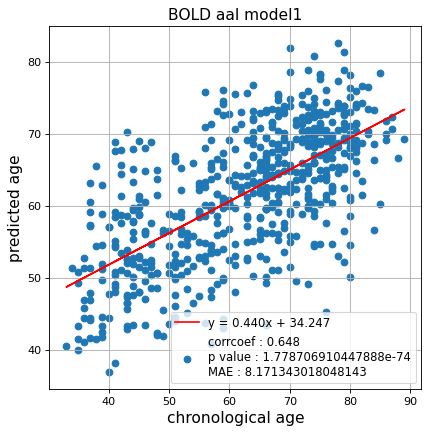

相関係数:  0.6478593609918845
r^2 val data:  0.4161792165119773
切片:  34.247342974348896
傾き:  0.44020640963830077


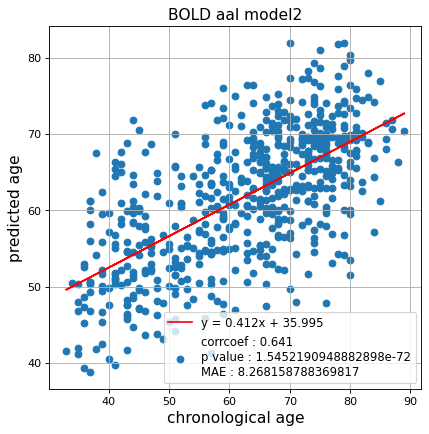

相関係数:  0.6412699151644832
r^2 val data:  0.4087081974965343
切片:  35.994690244247714
傾き:  0.4122571648857055


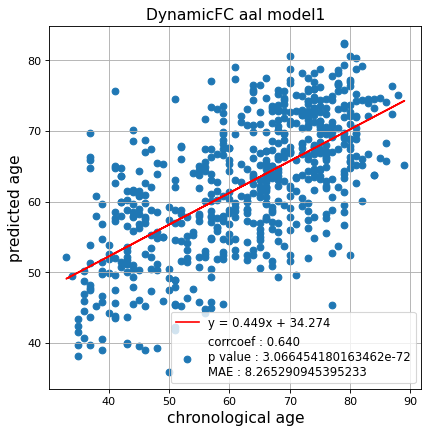

相関係数:  0.6402438216349646
r^2 val data:  0.40608613775764935
切片:  34.27392148379427
傾き:  0.44930902442452203


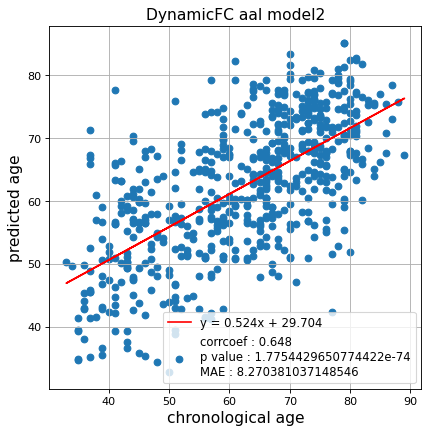

相関係数:  0.6478620386754657
r^2 val data:  0.393841122369719
切片:  29.704051148311045
傾き:  0.5239566301526362


In [14]:
test_plot(test_pred_aal_1,test_label_aal_1,'BOLD aal model1')
test_plot(test_pred_aal_2,test_label_aal_2,'BOLD aal model2')
test_plot(test_pred_aal_dynamic_1,test_label_aal_dynamic_1,'DynamicFC aal model1')
test_plot(test_pred_aal_dynamic_2,test_label_aal_dynamic_2,'DynamicFC aal model2')

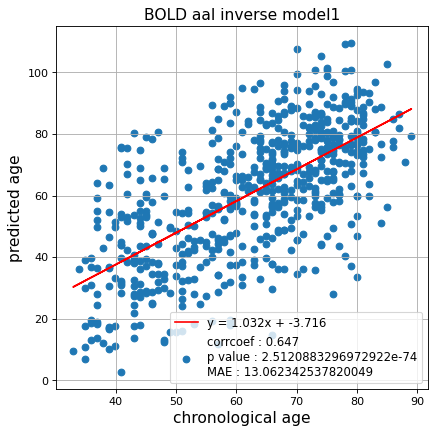

相関係数:  0.6473555802573996
r^2 val data:  -0.49317408897928505
切片:  -3.715829191175139
傾き:  1.031699497955023


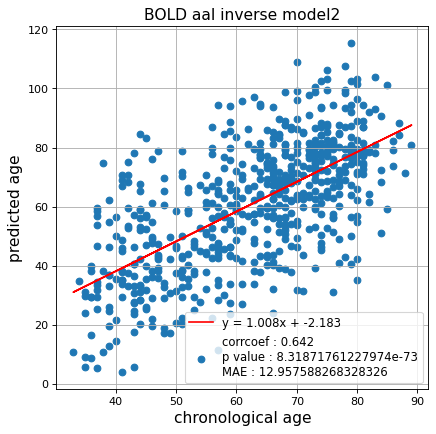

相関係数:  0.6421936646770714
r^2 val data:  -0.4635391126564272
切片:  -2.182943974228884
傾き:  1.008118579283798


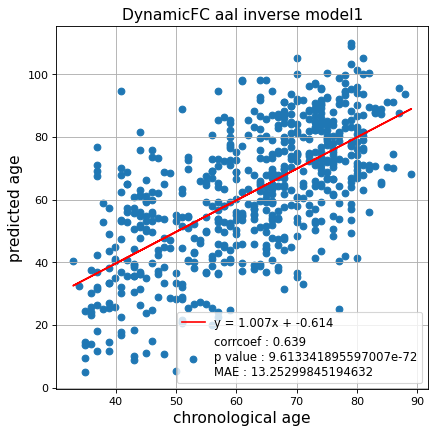

相関係数:  0.6385243595874643
r^2 val data:  -0.47245753554016745
切片:  -0.6137751180132298
傾き:  1.0066880081201337


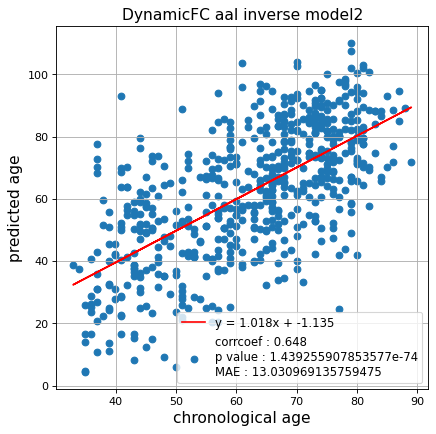

相関係数:  0.6481679046530435
r^2 val data:  -0.42946909410332745
切片:  -1.1350201751212907
傾き:  1.01755595392541


In [15]:
test_plot(test_pred_aal_inverse_1,test_label_aal_1,'BOLD aal inverse model1')
test_plot(test_pred_aal_inverse_2,test_label_aal_2,'BOLD aal inverse model2')
test_plot(test_pred_aal_dynamic_inverse_1,test_label_aal_dynamic_1,'DynamicFC aal inverse model1')
test_plot(test_pred_aal_dynamic_inverse_2,test_label_aal_dynamic_2,'DynamicFC aal inverse model2')

### Harvard-Oxford

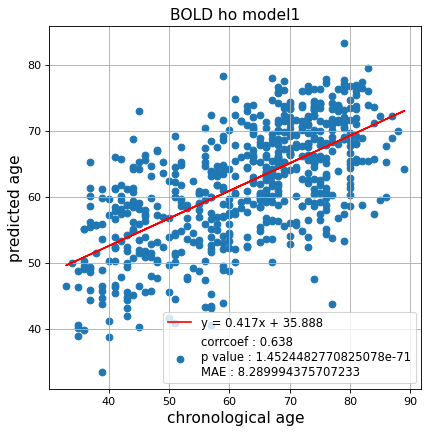

相関係数:  0.6379006337769169
r^2 val data:  0.40540538084149635
切片:  35.88804040987182
傾き:  0.4171494952619025


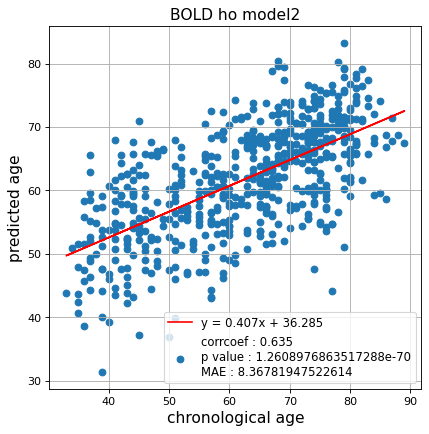

相関係数:  0.6346105564908477
r^2 val data:  0.39996440089821605
切片:  36.285373724862495
傾き:  0.4071743697163566


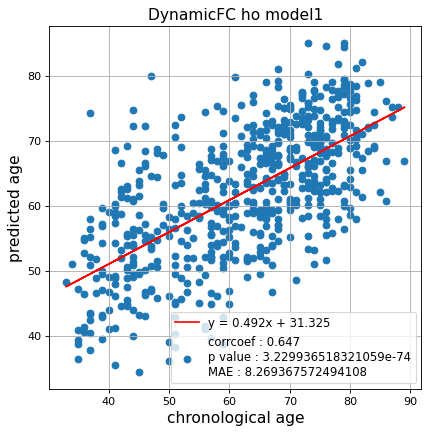

相関係数:  0.6469881938684793
r^2 val data:  0.4049183751113864
切片:  31.32526730665787
傾き:  0.4924549764005554


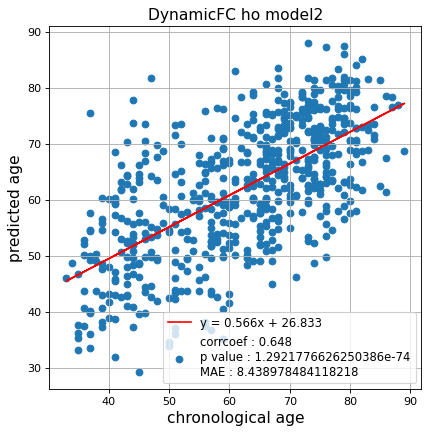

相関係数:  0.6483248322380909
r^2 val data:  0.36959969874559484
切片:  26.832507580590082
傾き:  0.5658181949128621


In [16]:
test_plot(test_pred_ho_1,test_label_ho_1,'BOLD ho model1')
test_plot(test_pred_ho_2,test_label_ho_2,'BOLD ho model2')
test_plot(test_pred_ho_dynamic_1,test_label_ho_dynamic_1,'DynamicFC ho model1')
test_plot(test_pred_ho_dynamic_2,test_label_ho_dynamic_2,'DynamicFC ho model2')

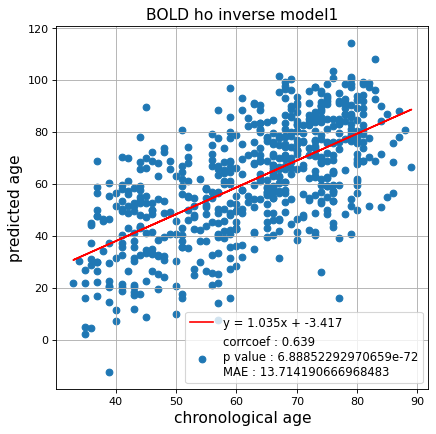

相関係数:  0.6390270470752859
r^2 val data:  -0.5610679628385584
切片:  -3.417306670950218
傾き:  1.0347359235260045


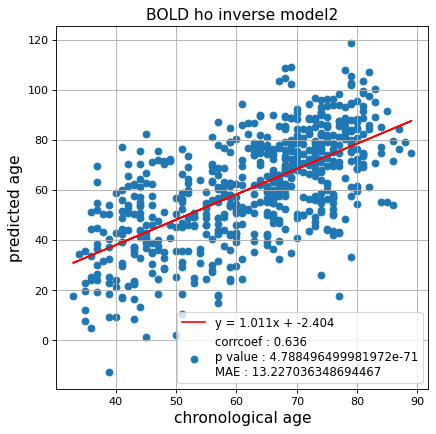

相関係数:  0.6360894515285201
r^2 val data:  -0.5209522710710903
切片:  -2.404173552478831
傾き:  1.0112730211130057


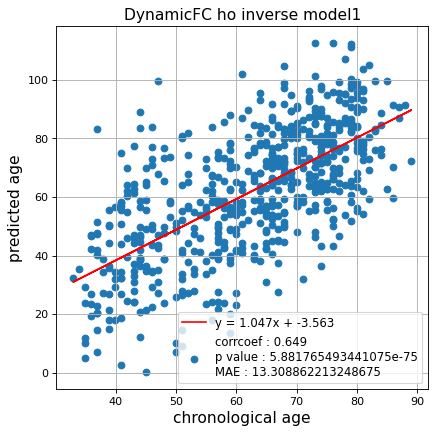

相関係数:  0.6494677976571239
r^2 val data:  -0.5064897690152128
切片:  -3.562964152466499
傾き:  1.046788896612243


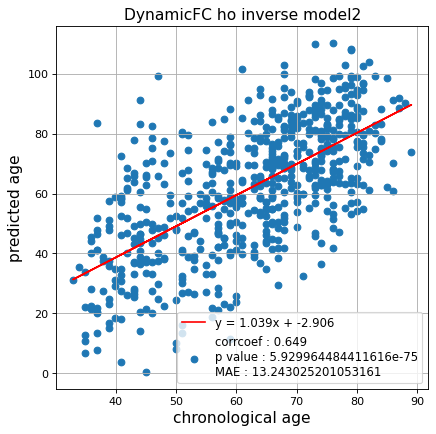

相関係数:  0.6494559711216711
r^2 val data:  -0.4825274610306829
切片:  -2.9060237211039563
傾き:  1.0389745924227782


In [17]:
test_plot(test_pred_ho_inverse_1,test_label_ho_1,'BOLD ho inverse model1')
test_plot(test_pred_ho_inverse_2,test_label_ho_2,'BOLD ho inverse model2')
test_plot(test_pred_ho_dynamic_inverse_1,test_label_ho_dynamic_1,'DynamicFC ho inverse model1')
test_plot(test_pred_ho_dynamic_inverse_2,test_label_ho_dynamic_2,'DynamicFC ho inverse model2')

### Multi ALL

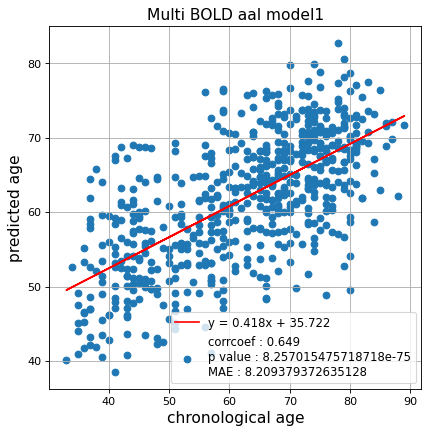

相関係数:  0.6489758058159072
r^2 val data:  0.41927053364555666
切片:  35.72164195806407
傾き:  0.4181102960053061


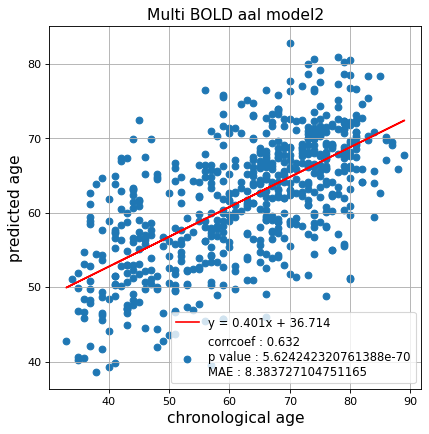

相関係数:  0.6323106113177972
r^2 val data:  0.3973833460878369
切片:  36.713698976714824
傾き:  0.40091977232413


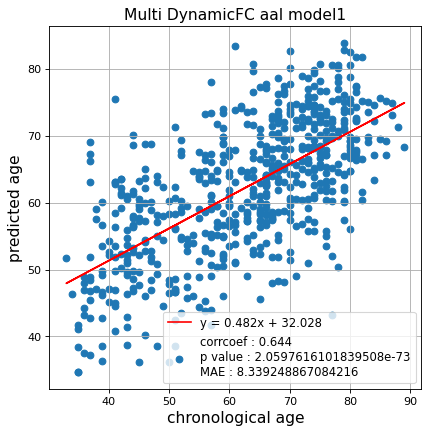

相関係数:  0.6442644013826329
r^2 val data:  0.40377181755502445
切片:  32.02769401057735
傾き:  0.4823594042241834


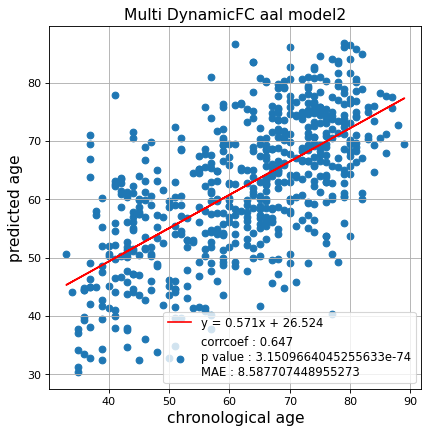

相関係数:  0.647024397384308
r^2 val data:  0.36309955182695997
切片:  26.523812662108043
傾き:  0.5705790192913747


In [18]:
test_plot(test_pred_multi_aal_1,test_label_multi_aal_1,'Multi BOLD aal model1')
test_plot(test_pred_multi_aal_2,test_label_multi_aal_2,'Multi BOLD aal model2')
test_plot(test_pred_multi_aal_dynamic_1,test_label_multi_aal_dynamic_1,'Multi DynamicFC aal model1')
test_plot(test_pred_multi_aal_dynamic_2,test_label_multi_aal_dynamic_2,'Multi DynamicFC aal model2')

### Multi Harvard-Oxford

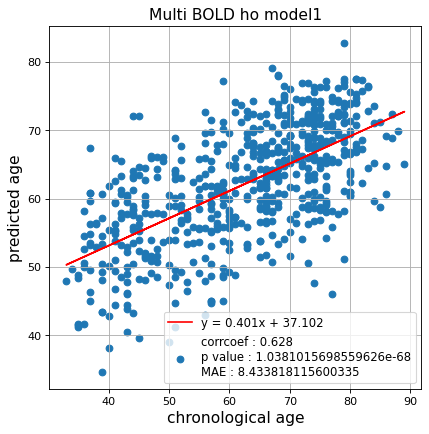

相関係数:  0.6277695142467753
r^2 val data:  0.39349891095510303
切片:  37.10152388176514
傾き:  0.40057181938964664


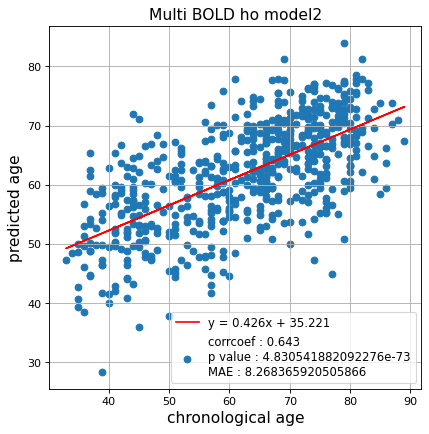

相関係数:  0.6430018842666008
r^2 val data:  0.41122495024439587
切片:  35.22082700529205
傾き:  0.4262546787944161


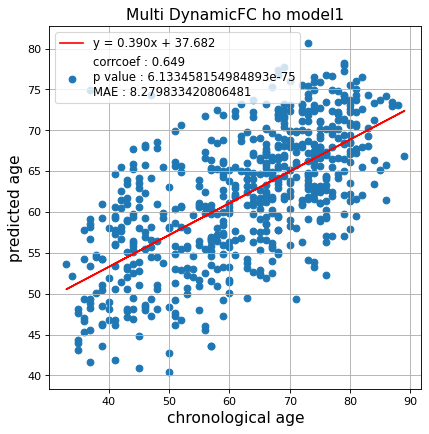

相関係数:  0.6494070718915703
r^2 val data:  0.4184308062186177
切片:  37.68224363302636
傾き:  0.3896906449181382


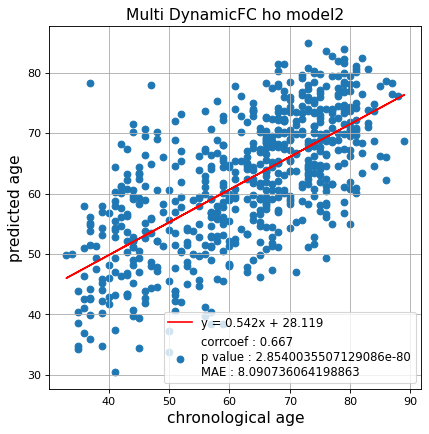

相関係数:  0.6666253291403246
r^2 val data:  0.421800989006632
切片:  28.118962308820386
傾き:  0.5419950259681778


In [19]:
test_plot(test_pred_multi_ho_1,test_label_multi_ho_1,'Multi BOLD ho model1')
test_plot(test_pred_multi_ho_2,test_label_multi_ho_2,'Multi BOLD ho model2')
test_plot(test_pred_multi_ho_dynamic_1,test_label_multi_ho_dynamic_1,'Multi DynamicFC ho model1')
test_plot(test_pred_multi_ho_dynamic_2,test_label_multi_ho_dynamic_2,'Multi DynamicFC ho model2')

## 他指標との相関

In [20]:
def test_compare(preds,labels,title=''):
    for i in range(n_splits):
        if not i:
            label = labels[i,:,0:1]
        else:
            label = np.concatenate([label,labels[i,:,0:1]])

    for i in range(n_splits):
        if not i:
            pred = preds[i].mean(axis=0)[:,0:1]
        else:
            pred = np.concatenate([pred,preds[i].mean(axis=0)[:,0:1]])
            
    new_line = '\n'
    
    lr = LinearRegression()
    lr.fit(label*age_std+age_mean,pred[:,0]*age_std+age_mean)
    label_pred = lr.predict(label*age_std+age_mean)
    
    label = label.reshape(-1)
    label = label*age_std+age_mean
    pred  = pred.reshape(-1)
    pred  = pred*age_std+age_mean 
    diff  = pred - label_pred
    
    corr_diff,p_diff = pearsonr(diff,data_label[:,2])
    corr_pred,p_pred = pearsonr(pred,data_label[:,2])
    corr_label,p_label = pearsonr(label_pred,data_label[:,2])
    
    plt.figure(figsize=(6, 6), dpi=80)
    plt.scatter(diff,data_label[:,2],
               label = f'corrcoef diff: {corr_diff:.3f},p value : {p_diff:.3f}{new_line}\
corrcoef pred: {corr_pred:.3f},p value : {p_pred:.3f}{new_line}\
corrcoef label: {corr_label:.3f},p value : {p_label:.3f}')#散布図をプロット
    plt.title(title, fontsize=14)   # 図のタイトル
    plt.xlabel('predicted - label predicted', fontsize=14)    # x軸のラベル
    plt.ylabel('apathy score', fontsize=14)  # y軸のラベル
    plt.legend(fontsize=10.5)
    plt.grid()                     # グリッド線を表示
    plt.show()                     # 図の表示
    
    print("相関係数　diff:", corr_diff)
    print("p値:", p_diff)
    print()
    print("相関係数　pred:", corr_pred)
    print("p値:", p_pred)
    print()
    print("相関係数　label:", corr_label)
    print("p値:", p_label)

### AAL

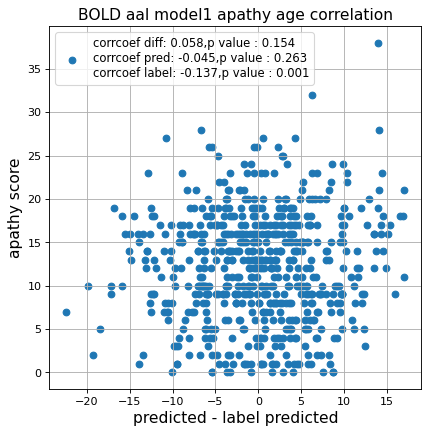

相関係数　diff: 0.05756810408780158
p値: 0.15389119433927367

相関係数　pred: -0.045161903370314616
p値: 0.2634513141992725

相関係数　label: -0.13739861517846255
p値: 0.0006339440906362937


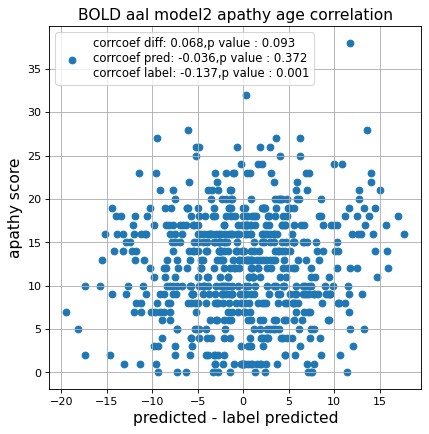

相関係数　diff: 0.067821056505357
p値: 0.09287543075318279

相関係数　pred: -0.03606945961215492
p値: 0.37187628115633004

相関係数　label: -0.1373986151784625
p値: 0.0006339440906362937


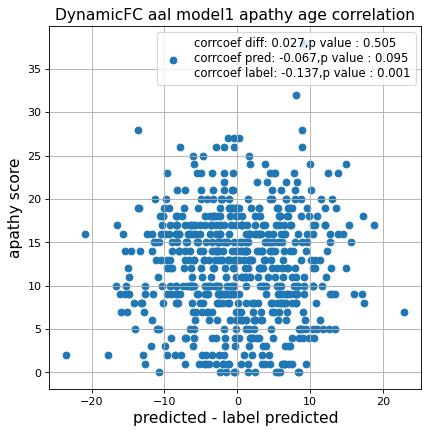

相関係数　diff: 0.026906746538951504
p値: 0.5053927546345053

相関係数　pred: -0.06729961211063797
p値: 0.09542067653294224

相関係数　label: -0.13739861517846252
p値: 0.0006339440906362937


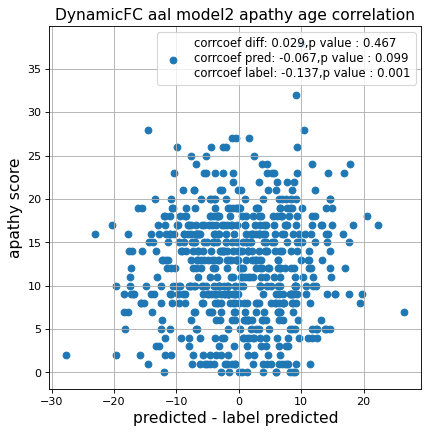

相関係数　diff: 0.02936046858373454
p値: 0.46735379060949567

相関係数　pred: -0.06664978322723186
p値: 0.09867023574138481

相関係数　label: -0.13739861517846258
p値: 0.0006339440906362937


In [21]:
test_compare(test_pred_aal_1,test_label_aal_1,'BOLD aal model1 apathy age correlation')
test_compare(test_pred_aal_2,test_label_aal_2,'BOLD aal model2 apathy age correlation')
test_compare(test_pred_aal_dynamic_1,test_label_aal_dynamic_1,'DynamicFC aal model1 apathy age correlation')
test_compare(test_pred_aal_dynamic_2,test_label_aal_dynamic_2,'DynamicFC aal model2 apathy age correlation')

### Harvard-Oxford

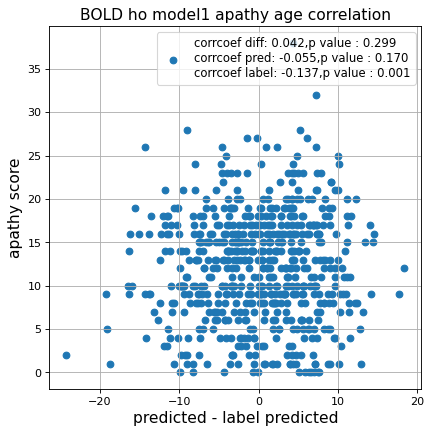

相関係数　diff: 0.04190439329259657
p値: 0.29948577115332115

相関係数　pred: -0.055375307987481324
p値: 0.17021238897771412

相関係数　label: -0.1373986151784625
p値: 0.0006339440906362937


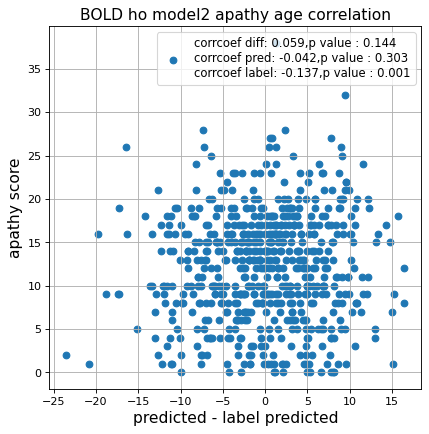

相関係数　diff: 0.0590257725128138
p値: 0.14371694652553246

相関係数　pred: -0.041577598304366255
p値: 0.303273706253196

相関係数　label: -0.13739861517846255
p値: 0.0006339440906362937


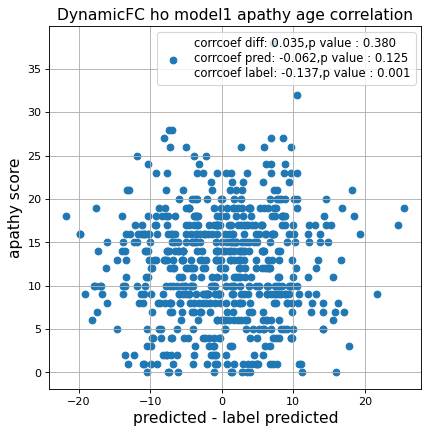

相関係数　diff: 0.03547305454401352
p値: 0.37984069399535136

相関係数　pred: -0.06184707802240809
p値: 0.12549670380084993

相関係数　label: -0.13739861517846255
p値: 0.0006339440906362937


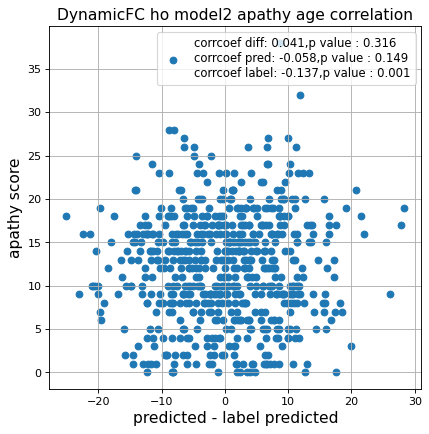

相関係数　diff: 0.04051456231148356
p値: 0.31581439515910936

相関係数　pred: -0.058232609517167404
p値: 0.14918731099743165

相関係数　label: -0.13739861517846252
p値: 0.0006339440906362937


In [22]:
test_compare(test_pred_ho_1,test_label_ho_1,'BOLD ho model1 apathy age correlation')
test_compare(test_pred_ho_2,test_label_ho_2,'BOLD ho model2 apathy age correlation')
test_compare(test_pred_ho_dynamic_1,test_label_ho_dynamic_1,'DynamicFC ho model1 apathy age correlation')
test_compare(test_pred_ho_dynamic_2,test_label_ho_dynamic_2,'DynamicFC ho model2 apathy age correlation')

### Multi AAL

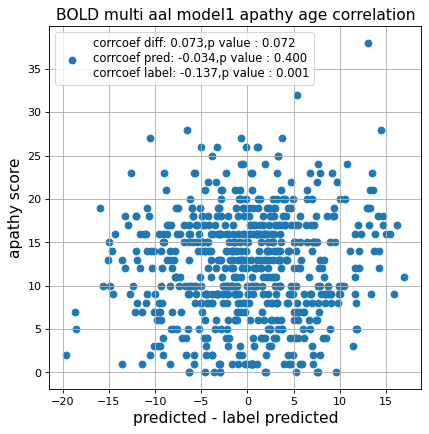

相関係数　diff: 0.0725374488168279
p値: 0.07224373271102222

相関係数　pred: -0.033981228377851405
p値: 0.40021596082111444

相関係数　label: -0.13739861517846255
p値: 0.0006339440906362937


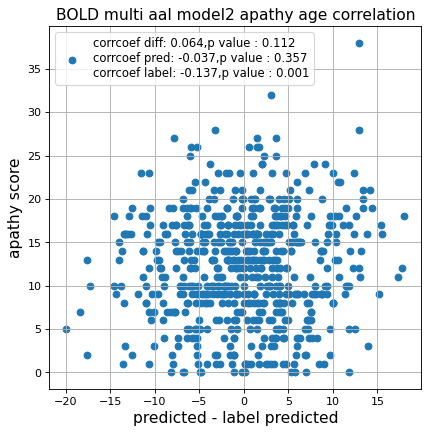

相関係数　diff: 0.06411762546593151
p値: 0.11218116315160723

相関係数　pred: -0.03720571782725936
p値: 0.3569911047673953

相関係数　label: -0.13739861517846255
p値: 0.0006339440906362937


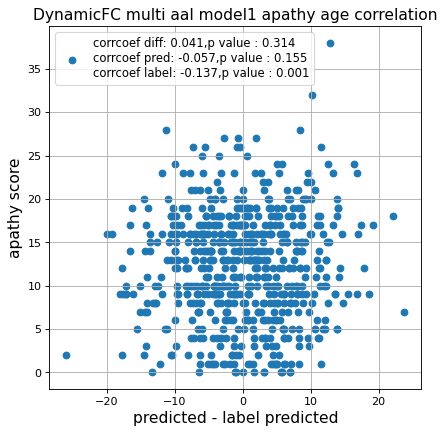

相関係数　diff: 0.040626671923680635
p値: 0.31447603455384865

相関係数　pred: -0.05744964332063669
p値: 0.15474143534479648

相関係数　label: -0.13739861517846255
p値: 0.0006339440906362937


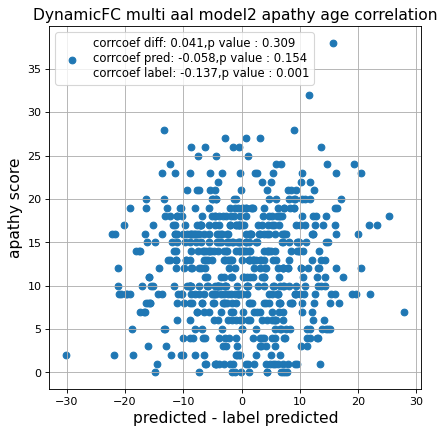

相関係数　diff: 0.04106715217428135
p値: 0.30925366961252576

相関係数　pred: -0.057587813349434684
p値: 0.15375007734543533

相関係数　label: -0.13739861517846258
p値: 0.0006339440906362937


In [23]:
test_compare(test_pred_multi_aal_1,test_label_multi_aal_1,'BOLD multi aal model1 apathy age correlation')
test_compare(test_pred_multi_aal_2,test_label_multi_aal_2,'BOLD multi aal model2 apathy age correlation')
test_compare(test_pred_multi_aal_dynamic_1,test_label_multi_aal_dynamic_1,'DynamicFC multi aal model1 apathy age correlation')
test_compare(test_pred_multi_aal_dynamic_2,test_label_multi_aal_dynamic_2,'DynamicFC multi aal model2 apathy age correlation')

### Multi Harvard-Oxford

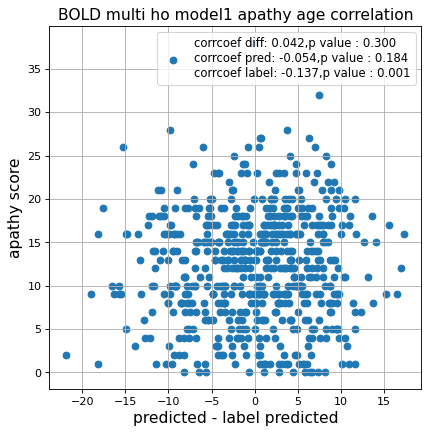

相関係数　diff: 0.04189377284816096
p値: 0.29960837733661316

相関係数　pred: -0.053644578194342124
p値: 0.18398242578666968

相関係数　label: -0.13739861517846255
p値: 0.0006339440906362937


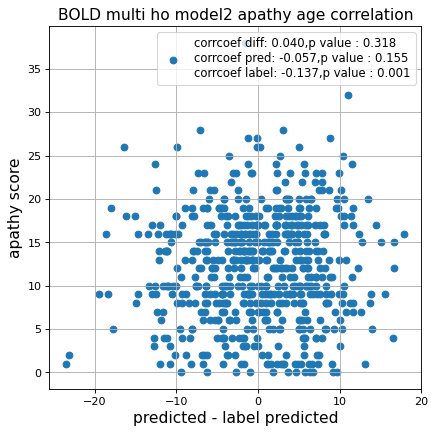

相関係数　diff: 0.04033329282897467
p値: 0.31798626562252014

相関係数　pred: -0.05745772770504631
p値: 0.15468329750740895

相関係数　label: -0.13739861517846247
p値: 0.0006339440906362937


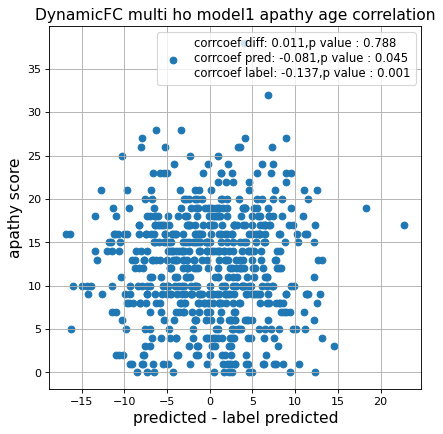

相関係数　diff: 0.010882571314800459
p値: 0.787669654200228

相関係数　pred: -0.08095207947114796
p値: 0.04477559366189888

相関係数　label: -0.13739861517846252
p値: 0.0006339440906362937


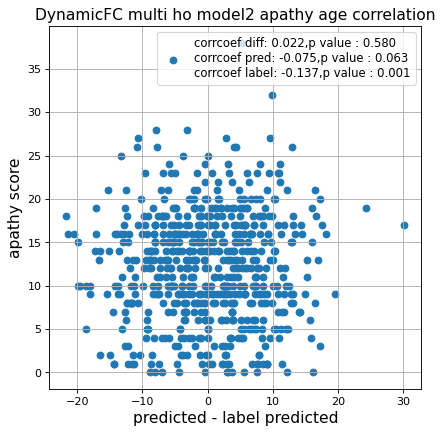

相関係数　diff: 0.022372179574796265
p値: 0.5797481729751106

相関係数　pred: -0.07491733062443519
p値: 0.06335106624078854

相関係数　label: -0.13739861517846258
p値: 0.0006339440906362937


In [24]:
test_compare(test_pred_multi_ho_1,test_label_multi_ho_1,'BOLD multi ho model1 apathy age correlation')
test_compare(test_pred_multi_ho_2,test_label_multi_ho_2,'BOLD multi ho model2 apathy age correlation')
test_compare(test_pred_multi_ho_dynamic_1,test_label_multi_ho_dynamic_1,'DynamicFC multi ho model1 apathy age correlation')
test_compare(test_pred_multi_ho_dynamic_2,test_label_multi_ho_dynamic_2,'DynamicFC multi ho model2 apathy age correlation')

## 相補性

In [25]:
def test_complement(preds1,preds2):
    for i in range(n_splits):
        if not i:
            pred1 = preds1[i].mean(axis=0)
        else:
            pred1 = np.concatenate([pred1,preds1[i].mean(axis=0)])
    for i in range(n_splits):
        if not i:
            pred2 = preds2[i].mean(axis=0)
        else:
            pred2 = np.concatenate([pred2,preds2[i].mean(axis=0)])
    
    new_line = '\n'

    corr,p = pearsonr(pred1[:,0]*age_std + age_mean,pred2[:,0]*age_std + age_mean)
    lr = LinearRegression()
    lr.fit(pred1*age_std + age_mean,pred2[:,0]*age_std + age_mean)
    
    plt.figure(figsize=(6, 6), dpi=80)
    plt.scatter(pred1[:,0]*age_std + age_mean,pred2[:,0]*age_std + age_mean,
               label = f'corrcoef: {corr:.3f}{new_line}p value : {p}')
    plt.legend(fontsize=10.5)
    plt.grid()                     # グリッド線を表示
    plt.show()                     # 図の表示

    print("相関係数: ", corr)
    print('r^2 data: ', r2_score(pred1[:,0],pred2[:,0]))
    print('切片: ', lr.intercept_)
    print('傾き: ', lr.coef_[0])

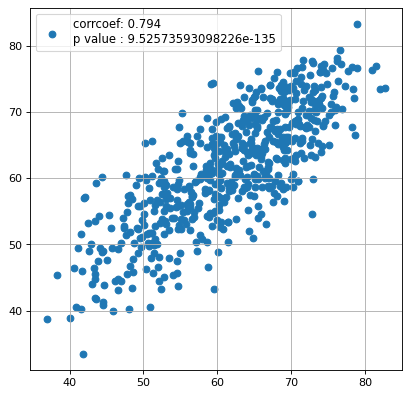

相関係数:  0.7942195646292428
r^2 data:  0.6020067542056744
切片:  14.743477
傾き:  0.76436996


In [26]:
test_complement(test_pred_aal_1,test_pred_ho_1)

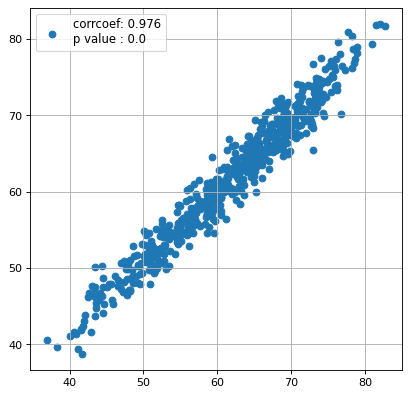

相関係数:  0.9759240767482203
r^2 data:  0.9515400893942919
切片:  4.733631
傾き:  0.9233529


In [27]:
test_complement(test_pred_aal_1,test_pred_aal_2)

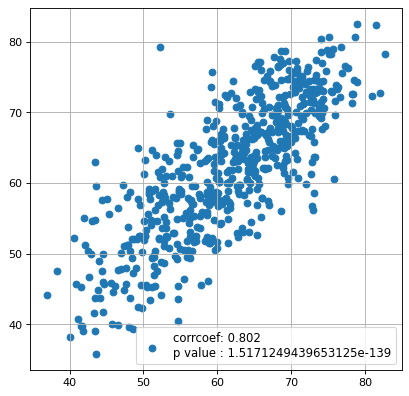

相関係数:  0.8023988575202824
r^2 data:  0.586531265130747
切片:  11.163876
傾き:  0.8287325


In [28]:
test_complement(test_pred_aal_1,test_pred_aal_dynamic_1)

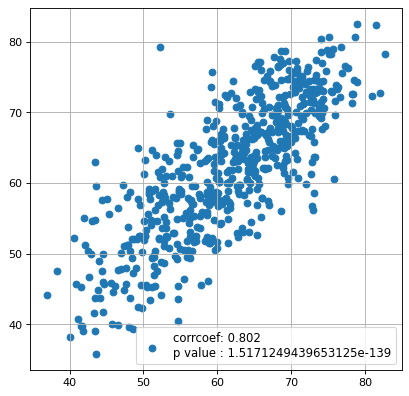

相関係数:  0.8023988575202824
r^2 data:  0.586531265130747
切片:  11.163876
傾き:  0.8287325


In [29]:
test_complement(test_pred_aal_1,test_pred_aal_dynamic_1)

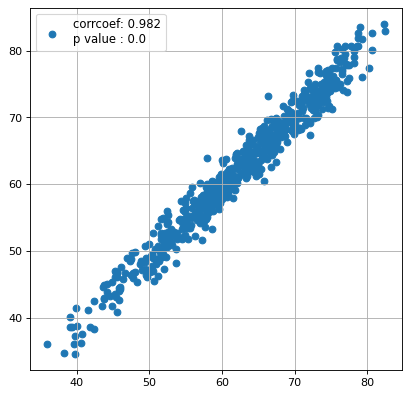

相関係数:  0.9824727192179689
r^2 data:  0.9577521395280312
切片:  -3.184845
傾き:  1.0481596


In [30]:
test_complement(test_pred_aal_dynamic_1,test_pred_multi_aal_dynamic_1)

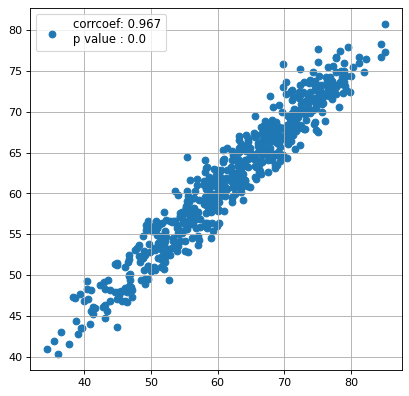

相関係数:  0.9666300444805781
r^2 data:  0.9025703017037998
切片:  14.709175
傾き:  0.76206684


In [31]:
test_complement(test_pred_ho_dynamic_1,test_pred_multi_ho_dynamic_1)

In [32]:
a = (test_pred_aal_1 + test_pred_ho_1) / 2

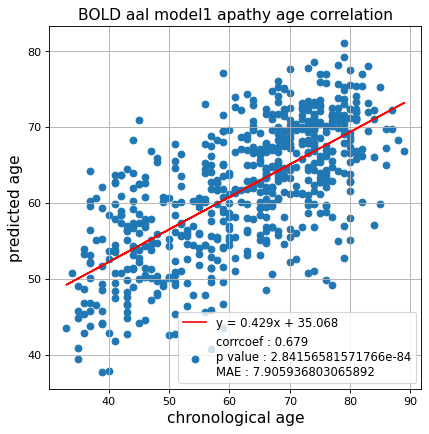

相関係数:  0.6788321454529034
r^2 val data:  0.45672975973192365
切片:  35.067692012586846
傾き:  0.4286779483574608


In [33]:
test_plot(a,test_label_aal_1,'BOLD aal model1 apathy age correlation')

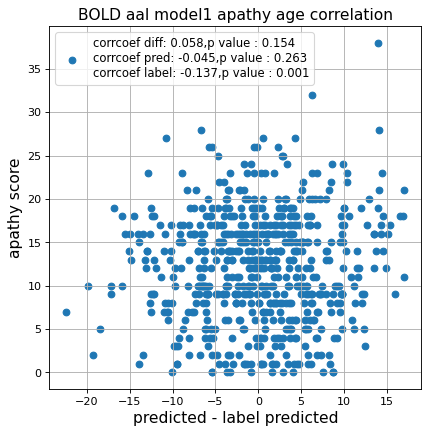

相関係数　diff: 0.05756810408780158
p値: 0.15389119433927367

相関係数　pred: -0.045161903370314616
p値: 0.2634513141992725

相関係数　label: -0.13739861517846255
p値: 0.0006339440906362937


In [34]:
test_compare(test_pred_aal_1,test_label_aal_1,'BOLD aal model1 apathy age correlation')

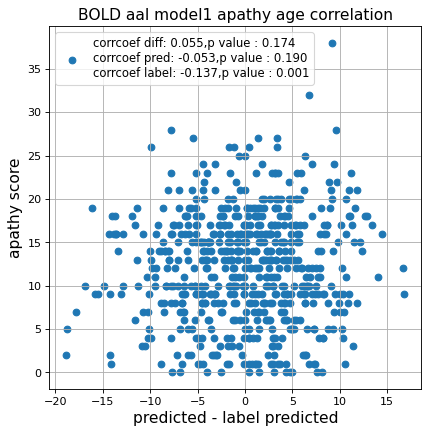

相関係数　diff: 0.05488532388307117
p値: 0.17403017368652707

相関係数　pred: -0.0529686599967024
p値: 0.18957794103998835

相関係数　label: -0.13739861517846252
p値: 0.0006339440906362937


In [35]:
test_compare(a,test_label_aal_1,'BOLD aal model1 apathy age correlation')

## 男女分類

In [36]:
def test_sex_plot(preds,labels,title=''):
    for i in range(n_splits):
        if not i:
            label = labels[i,:,1:2]
        else:
            label = np.concatenate([label,labels[i,:,1:2]])

    for i in range(n_splits):
        if not i:
            pred = preds[i].mean(axis=0)[:,1:2]
        else:
            pred = np.concatenate([pred,preds[i].mean(axis=0)[:,1:2]])
    
    new_line = '\n'
    
    acc = 0
    for i,c in enumerate(label[:,0]):
        if c == 1:
            if pred[:,0][i] >= 0.5:
                acc += 1
        else:
            if pred[:,0][i] < 0.5:
                acc += 1
    q = 1/2
    n = len(label[:,0])
    z = (acc - n*q)/np.sqrt(n*q*(1-q))
    p = norm.sf(z)
    acc = acc/len(label[:,0])

    plt.figure(figsize=(6, 6), dpi=80)
    plt.scatter(label[:,0],pred[:,0],
               label = f'train accuracy : {acc:.3f}{new_line}p value : {p}')
    plt.title(title + ' ' + 'sex train', fontsize=14)   # 図のタイトル
    plt.xlabel('chronological sex', fontsize=14) # x軸のラベル
    plt.ylabel('predicted probability', fontsize=14) # y軸のラベル
    plt.legend(fontsize=10.5)
    plt.grid()
    plt.show()

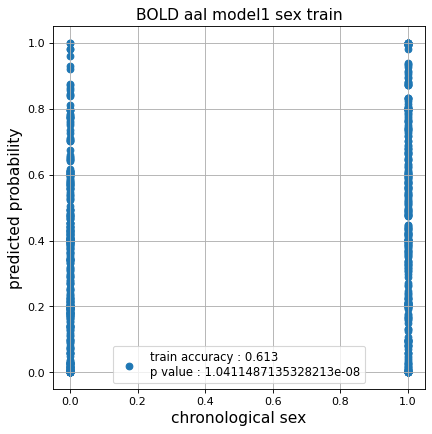

In [37]:
test_sex_plot(test_pred_multi_aal_1,test_label_multi_aal_1,'BOLD aal model1')

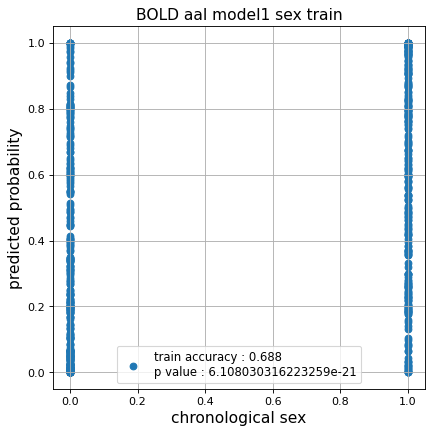

In [38]:
test_sex_plot(test_pred_multi_aal_dynamic_1,test_label_multi_aal_dynamic_1,'BOLD aal model1')

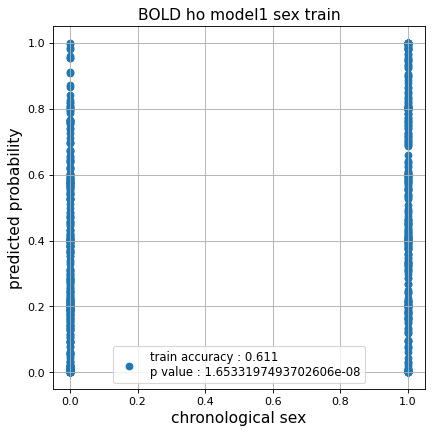

In [39]:
test_sex_plot(test_pred_multi_ho_1,test_label_multi_ho_1,'BOLD ho model1')